In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

In [2]:
torch.__version__

'1.8.1'

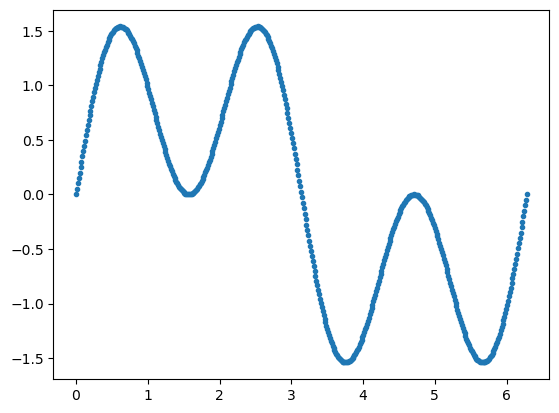

In [44]:
X = torch.linspace(0,2*np.pi,500)
Y = torch.sin(X) + torch.sin(3*X)
plt.plot(X,Y,'.')

In [40]:
class FC_model(torch.nn.Module):
    def __init__(self,n_hidden=10):
        super().__init__()
        self.lin_layer_1 = torch.nn.Linear(1,10)
        self.lin_layer_2 = torch.nn.Linear(10,20)
        self.lin_layer_3 = torch.nn.Linear(20,100)
        self.lin_layer_4 = torch.nn.Linear(100,50)
        self.lin_layer_5 = torch.nn.Linear(50,10)
        self.lin_layer_6 = torch.nn.Linear(10,1)


        
    def forward(self,x):
        x = F.relu(self.lin_layer_1(x))
        x = F.relu(self.lin_layer_2(x))
        x = F.relu(self.lin_layer_3(x))
        x = F.relu(self.lin_layer_4(x))
        x = F.relu(self.lin_layer_5(x))
        y =self.lin_layer_6(x)
        return y

In [12]:
class FC_model_2(torch.nn.Module):
    def __init__(self,n_hidden=10):
        super().__init__()
        self.lin_layer_1 = torch.nn.Linear(1,n_hidden)
        self.lin_layer_2 = torch.nn.Linear(n_hidden,1)
        relu = torch.nn.ReLU()



        
    def forward(self,x):
        x = F.relu(self.lin_layer_1(x))
        x = self.lin_layer_2(x)

        return x

In [ ]:
model = torch.nn.Sequential([torch.nn.Linear(1,n_hidden),torch.nn.ReLU(),torch.nn.Linear(n_hidden,1)])

In [48]:
model = FC_model()
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fun = torch.nn.MSELoss()
dataloader = torch.utils.data.DataLoader(list(zip(X,Y)),batch_size=32, shuffle=True)



In [ ]:
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3,momentum=0.1)
# for g in optimizer.param_groups:
#     g['lr'] = 1e-3
for epoch in range(1000):
    print(epoch)
    for x,y in dataloader:
        optimizer.zero_grad()
        y_pred = model.forward(x.reshape(-1,1))
#         print(y_pred,y.reshape(-1,1))
        loss = loss_fun(y_pred, y.reshape(-1,1))
#         print(loss.item())
        loss.backward()
#         print(model.lin_layer_3.weight.grad)
        #print(loss.item())
        optimizer.step()
        

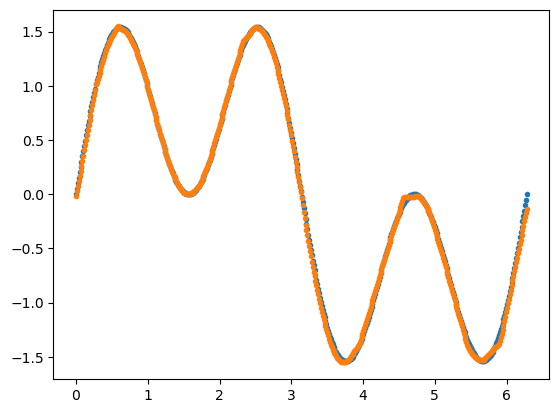

In [51]:
plt.plot(X,Y,'.')
model.eval()
with torch.no_grad():
    plt.plot(X ,model.forward(X.reshape((-1,1))),'.')

# MNIST

Для самостоятельной работы предлагается решить задачу классификации на датасете изображений рукописных цифр MNIST.

Скорее всего вам понадобится использовать в данной работе преобразования над данными (аугментации и подготовка к корректному формату для ввода в модель). Для этого стоит ознакомиться с подмодулем [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html). 

Подготовьте данные, подумайте над выбором функции ошибки и метрикой качества. Опишите в тексте задания.

In [1]:
import torchvision

In [ ]:
mnist_ds = torchvision.datasets.MNIST('./',download=True)
mnist_ds

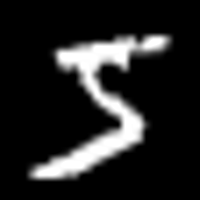

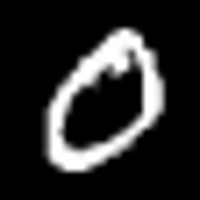

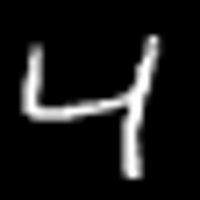

(None, None, None)

In [4]:
display(mnist_ds[0][0].resize((200,200))),display(mnist_ds[1][0].resize((200,200))),display(mnist_ds[2][0].resize((200,200)))

In [7]:
import torch

In [8]:
a = torch.randn((3,2,4))

In [9]:
a.shape

torch.Size([3, 2, 4])

In [17]:
a/a.max(dim=1,keepdim=True).values

tensor([[[-9.6608,  1.0000,  1.0000, -0.2959],
         [ 1.0000, -2.3810, -3.8174,  1.0000]],

        [[-0.5430, -0.0480,  1.0000,  1.0612],
         [ 1.0000,  1.0000,  0.4481,  1.0000]],

        [[-5.2595,  1.0000, -5.1362,  6.3438],
         [ 1.0000,  5.9362,  1.0000,  1.0000]]])